## Introduction

This project is to classify flowers into serveral categories based on the features given in the dataset by using two learning algorithms namley support vector machine and Decision Trees.


### Import required libraries

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

### Import the dataset

In [10]:
dataset = pd.read_csv('iris.csv')
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

### Get to know the dataset

In [25]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
dataset.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


### Dataset information

1. sepal length in cm  
2. sepal width in cm  
3. petal length in cm  
4. petal width in cm  
5. class: 
-- Iris Setosa

-- Iris Versicolour 

-- Iris Virginica



### Exploratory Data Analysis(EDA)

A quick look at the data shows that Petal.Length of class setosa is shorter than the Petal.Length of other classes -- is that true?

In [27]:
dataset['species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [17]:
dataset[dataset['petal_length'] < 2]['species'].head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

Cool, we have a first model that helps explain part of our data!

In [28]:
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

### Histogram for Sepal Length

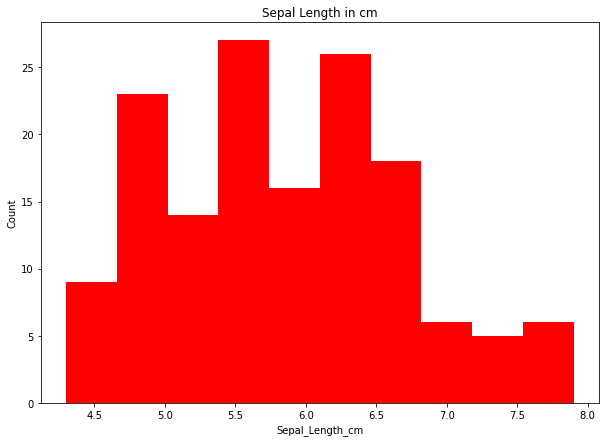

In [37]:
plt.figure(figsize = (10,7))
x = dataset['sepal_length']
plt.hist(x,bins=10,color='red')
plt.title('Sepal Length in cm')
plt.xlabel('Sepal_Length_cm')
plt.ylabel('Count')
plt.show()

### Histogram for Sepal Width

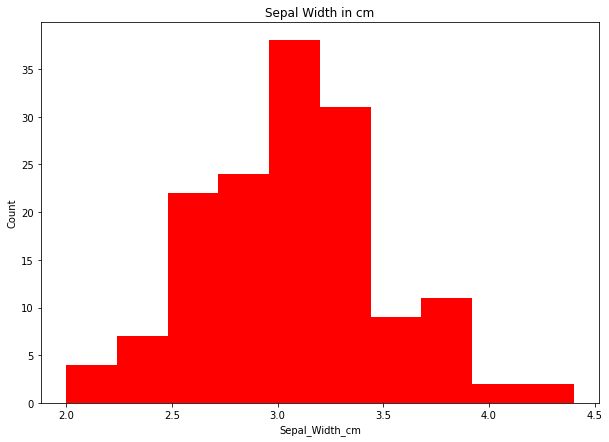

In [38]:
plt.figure(figsize = (10,7))
x = dataset['sepal_width']
plt.hist(x,bins=10,color ='red')
plt.title('Sepal Width in cm')
plt.xlabel('Sepal_Width_cm')
plt.ylabel('Count')
plt.show()

### Histogram for Petal length

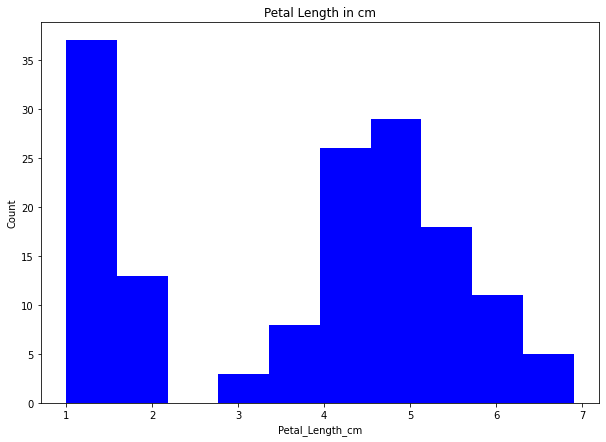

In [42]:
plt.figure(figsize = (10,7))
x = dataset['petal_length']
plt.hist(x,bins = 10,color='blue')
plt.title('Petal Length in cm')
plt.xlabel('Petal_Length_cm')
plt.ylabel('Count')
plt.show()

### Histogram for Petal Width

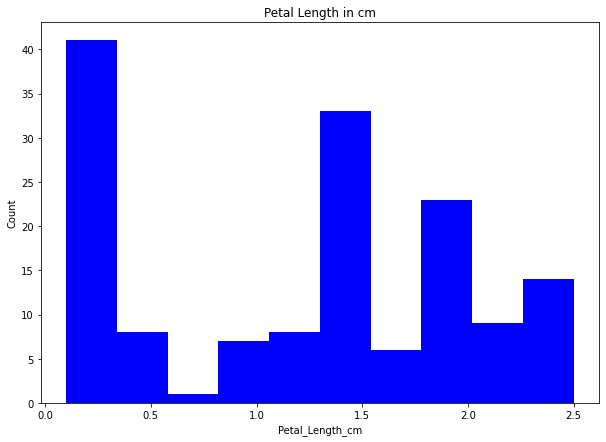

In [49]:
plt.figure(figsize = (10,7))
x = dataset['petal_width']
plt.hist(x,bins=10,color='blue')
plt.title('Petal Length in cm')
plt.xlabel('Petal_Length_cm')
plt.ylabel('Count')
plt.show()

### Box plot for iris data

<AxesSubplot:>

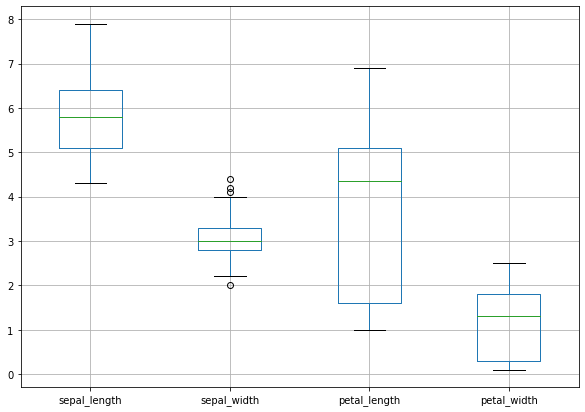

In [46]:
new_data = dataset[['sepal_length','sepal_width','petal_length','petal_width']]
plt.figure(figsize = (10,7))
new_data.boxplot()

### Objectives
There are two questions that we want to be able to answer after exploring this dataset, which are quite typical in classification problems:

Prediction — given new data points, how accurately can the model predict their classes (species)?




### Train-Test Split

Now, we can split the dataset into a training set and a test set. Usually, we should also have a validation set, which is used to evaluate the performance of each classifier, fine-tune, and determine the best model. The test set is mainly used for reporting. However, due to the small size of this dataset, we can simplify it by using the test set to serve the purpose of the validation set.

In [54]:
train, test = train_test_split(dataset, test_size = 0.4, stratify = dataset['species'], random_state = 42)

Note: I set 40 percent of data to be the test set to ensure there are enough data points to test the models.

In [73]:
X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train.species
X_test  = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test  = test.species

In [82]:
mod_dt = DecisionTreeClassifier(max_depth =3,
                                random_state =1)
mod_dt.fit(X_train,y_train)

prediction = mod_dt.predict(X_test)
print('The accuracy of the Decision Tree is'
      ,"{:.3f}".format(metrics.accuracy_score
                       (prediction,y_test)))

The accuracy of the Decision Tree is 0.983


In [86]:
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ['setosa', 'versicolor', 'virginica']

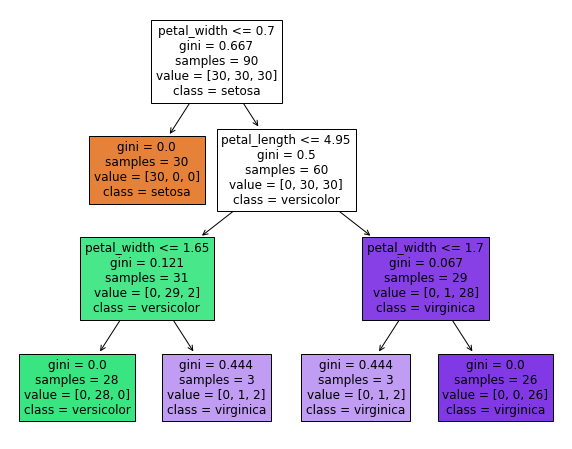

In [88]:
plt.figure(figsize = (10,8))
plot_tree(mod_dt,feature_names = fn, class_names = cn, filled = True)
plt.show()

Apart from each rule (e.g. the first criterion is petal_width ≤ 0.7), we can also see the Gini index (impurity measure) at each split, assigned class, etc. Note that all terminal nodes are pure besides the two “light purple” boxes at the bottom. We can less confident regarding instances in those two categories

Let's check our prediction results through confusion matrix.

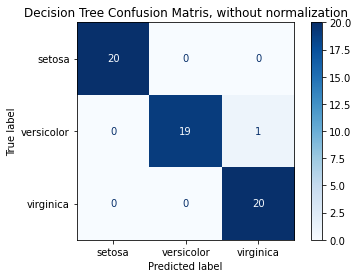

In [90]:
disp = metrics.plot_confusion_matrix(mod_dt,X_test,y_test,
                                    display_labels = cn,
                                    cmap=plt.cm.Blues,
                                    normalize=None)
disp.ax_.set_title('Decision Tree Confusion Matris, without normalization')
plt.show()

### Conclusion
Through this matrix, we see that there is one versicolor which we predict to be virginica.

One downside is building a single tree is its instability, which can be improved through ensemble techniques such as random forests, boosting, etc.